# Business Challange

In order to increase sales frequency, the All In One Place company needs to determine who are eligible customers to participate in the Insiders loyalty program.

## Solution Planning (IoT) 

### Input

<font size=4.5>1. Business Problem</font>
    - Definition of the clients who will be part of the insiders program.

<font size=4.5>2. Business Questions</font>

    - Who are the people eligible to participate in the Insiders program?
    - How many customers will be part of the group?
    - What are the main characteristics of these customers?
    - What is the contribution percentage of the billing, coming from Insiders?
    - What is this group's revenue expectation for the coming months?
    - What are the conditions for a person to be eligible for Insiders?
    - What are the conditions for a person to be removed from Insiders?
    - What is the guarantee that the Insiders program is better than the rest of the base?
    - What actions can the marketing team take to increase revenue?

<font size=4.5>3. Dataset</font>

**Invoice No:** Invoice number (A 6-digit integral number uniquely assigned to each transaction)

**Stock Code:** Product (item) code

**Description:** Product (item) name

**Quantity:** The quantities of each product (item) per transaction

**Invoice Date:** The day when each transaction was generated

**Unit Price:** Unit price (Product price per unit)

**Customer ID:** Customer number (Unique ID assigned to each customer)

**Country:** Country name (The name of the country where each customer resides)

### Output

1. Model that indicate what cluster the customer are, and the attributes of the cluster

    customer id | cluster
         01         1
         02         1
         03         2
         04         3
         05         1
         
2. Report with business questions.

- Who are the people eligible to participate in the Insiders program?
    - What is eligible, the criterions?
    
        - Revenues
            - High average ticket
            - High LTV
            - Low recency
            - High basket size
            - Low churn probabilition
            
        - Cost
            - Low devolution rate
            
        - Purchase experience
            - High rating average
            
- How many customers will be part of the group?
    - Number total of customers
    - % insiders group
    
- What are the main characteristics of these customers?
    - Describe customers caracteristics
        - Age
        - Gender
        - Location
        
    - Behavior purchasing
        - Clustering attributes
        
- What is the contribution percentage of the billing, coming from Insiders?
    - Revenue total in age
    - Revenue of insiders group
    
- What is this group's revenue expectation for the coming months?
    - LTV of insiders group
    - Cohort analysis
    
- What are the conditions for a person to be eligible for Insiders?
    - Define the periodicity of group 
    - Similarity to the insiders group
    
- What are the conditions for a person to be removed from Insiders?
    - Define the periodicity of group 
    - dissociation from the group
    
- What is the guarantee that the Insiders program is better than the rest of the base?
    - A/B test
    - A/B bayesian
    - hypothesis test
- What actions can the marketing team take to increase revenue?
    - Discount
    - Purchase preference
    - Free shipping
    - Visit the company

### Tasks

1. Data Description
2. Feature Engineering
3. EDA
4. Feature Selection
5. Data Preparation
6. Machine Learning Model
7. Cluster Profile
8. Deploy

## Bechmarking Solution

### Desk Reseach

<font size=5>RFM Model</font>
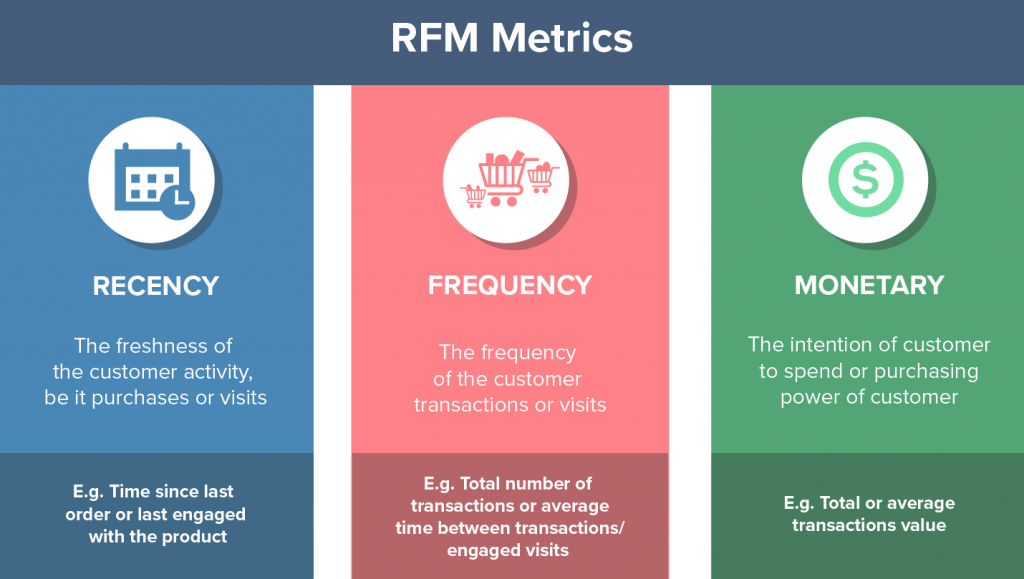


<font size=4.5>1. Recency: How long ago did they buy your product?</font>

<font size=4.5>2. Frequency: How often have they bought from you in a fixed time period?</font>

<font size=4.5>3. Monetary: How much have they spent on your products?</font>

Source 

P2P. Available on: https://peertopeermarketing.co/rfm-model/

<font size=5>RFM Segmentation</font>
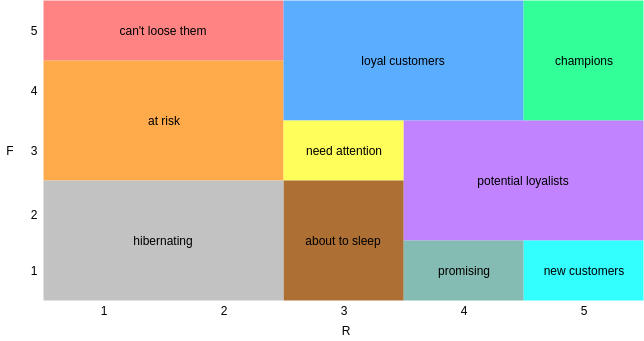

# Enviroment Development

## Imports

In [96]:
# Data manipulation
import pandas as pd
import re

# Models
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualization
import matplotlib
import seaborn           as sns
import plotly.express    as px
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Settings
from IPython.display import HTML

## Functions

## Settings

In [18]:
matplotlib.rcParams['figure.figsize'] = [12, 8]
sns.set_style(style='darkgrid')
# Jupyter Notebook width
display( HTML( '<style>.container { width:100% !important; }</style>') )

# Data Description

## Input

In [3]:
df_raw = pd.read_csv('../data/raw/ecommerce.csv', usecols=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 
                                                         'InvoiceDate','UnitPrice', 'CustomerID', 'Country'], 
                   encoding='ISO-8859-1')
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## Rename columns

In [4]:
df1 = df_raw.copy()
df1.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 
                'customer_id', 'country']

## Dimensions

In [5]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


## Data types

In [6]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## Check NaN

In [7]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NaN

In [8]:
df1.dropna(inplace=True)

In [9]:
print(f'Data removed: {round((1 - df1.shape[0] / df_raw.shape[0]) * 100)}%')

Data removed: 25%


In [10]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change data types

In [11]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])
df1['customer_id'] = df1['customer_id'].astype('int64')

## Descriptive Statistics

In [12]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(include='object')

### Numerical

In [19]:
desc = num_attributes.describe().drop(columns='customer_id').T

# range 
_range = pd.Series(num_attributes[['quantity', 'unit_price']].max() - num_attributes[['quantity', 'unit_price']].min(), name='range')

# Skew
skew = pd.Series(num_attributes[['quantity', 'unit_price']].skew(), name='Skew')

# Kurtosis
kurtosis = pd.Series(num_attributes[['quantity', 'unit_price']].kurtosis(), name='Kurtosis')

desc = pd.concat([desc, _range, skew, kurtosis], axis=1)
desc

,count,mean,std,min,25%,50%,75%,max,range,Skew,Kurtosis
quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0,161990.0,0.182663,94317.563673
unit_price,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0,38970.0,452.219019,246924.542988


    - Inespected Behavior
        - Quantity min negative
        - Unit price min equal to zero

### Categorical

In [29]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### Invoice Nº

In [39]:
invoice_letter = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]', x))), :]

print(f"Total number of invoices with letters: {len(invoice_letter)}")
print(f"Total number of invoices with negative quantitiy: {len(invoice_letter[invoice_letter['quantity'] < 0])}")

Total number of invoices with letters: 8905
Total number of invoices with negative quantitiy: 8905


#### Stock Code

In [42]:
df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), :]['stock_code'].unique()

# Remove stock code with only latters
# 'POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'

array(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

#### Description

In [43]:
df1['description'].unique()

# Action
# Delete description 

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

#### Country

In [49]:
round(df1['country'].value_counts(normalize=True) * 100, 2)

United Kingdom          88.95
Germany                  2.33
France                   2.09
EIRE                     1.84
Spain                    0.62
Netherlands              0.58
Belgium                  0.51
Switzerland              0.46
Portugal                 0.36
Australia                0.31
Norway                   0.27
Italy                    0.20
Channel Islands          0.19
Finland                  0.17
Cyprus                   0.15
Sweden                   0.11
Austria                  0.10
Denmark                  0.10
Japan                    0.09
Poland                   0.08
USA                      0.07
Israel                   0.06
Unspecified              0.06
Singapore                0.06
Iceland                  0.04
Canada                   0.04
Greece                   0.04
Malta                    0.03
United Arab Emirates     0.02
European Community       0.01
RSA                      0.01
Lebanon                  0.01
Lithuania                0.01
Brazil    

In [54]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().sort_values('customer_id', ascending=False)

,customer_id
country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


## Output

In [55]:
df1.to_csv('../data/processed/df1.csv', index=False)

# Data Filtering

In [73]:
df4 = pd.read_csv('../data/processed/df1.csv')
df4.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [74]:
#----------------------------Numerical Attributes------------------------------
# Unit price
df4 = df4.loc[df4['quantity'] > 0.04, :]


#----------------------------Categorical Attributes----------------------------
df4 = df4[~df4['stock_code'].isin(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'])]

# Description
df4 = df4.drop('description', axis=1)

# Map
df4 = df4[~df4['country'].isin(['European Community', 'Unspecified'])]

#----------------------------Split Data Frame----------------------------------
# Returns
df4_returns = df4[df4['quantity'] < 0]

# purchases
df4_purchases = df4[df4['quantity'] > 0]

In [75]:
df4.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,6,2016-11-29,3.39,17850,United Kingdom


## Data Output

In [72]:
df4.to_csv('../data/processed/data_filter.csv')
df4_returns.to_csv('../data/processed/data_filter_returns.csv')
df4_purchases.to_csv('../data/processed/data_filter_purchases.csv')

# Feature Engineering

## Input

In [76]:
# Purchases
df5 = pd.read_csv('../data/processed/data_filter_purchases.csv')
df5.head()

,Unnamed: 0,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
0,0,536365,85123A,6,2016-11-29,2.55,17850,United Kingdom
1,1,536365,71053,6,2016-11-29,3.39,17850,United Kingdom
2,2,536365,84406B,8,2016-11-29,2.75,17850,United Kingdom
3,3,536365,84029G,6,2016-11-29,3.39,17850,United Kingdom
4,4,536365,84029E,6,2016-11-29,3.39,17850,United Kingdom


## Feature Creation

In [85]:
# Reference data
df_ref = df5[['customer_id']].drop_duplicates(ignore_index=True)

# Gross revenue - price * quantity
df5.loc[:, 'gross_revenue'] = df5.loc[:, 'unit_price'] * df5.loc[:, 'quantity']

# Monetary
monetary = df5[['gross_revenue', 'customer_id']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, monetary, how='left', on='customer_id')

# Recency
recency = df5[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
recency['invoice_date'] = pd.to_datetime(recency['invoice_date'])
recency['recency_days'] = (recency['invoice_date'].max() - recency['invoice_date']).dt.days 
df_ref = pd.merge(df_ref, recency[['customer_id', 'recency_days']], how='left', on='customer_id')

# Frequency
frequency = df5[['invoice_no', 'customer_id']].drop_duplicates().groupby('customer_id').count().reset_index().rename(
                                                                            columns={'invoice_no': 'frequency'})
df_ref = pd.merge(df_ref, frequency, how='left', on='customer_id')

# Avg Ticket 
df_avg_ticket = df5[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')

In [87]:
df_ref.head()

,customer_id,gross_revenue,recency_days,frequency,avg_ticket
0,17850,5391.21,372,34,18.152222
1,13047,3232.59,56,9,18.904035
2,12583,6705.38,2,15,28.902500
3,13748,948.25,95,5,33.866071
4,15100,876.00,333,3,292.000000


## Output

In [88]:
df_ref.to_csv('../data/processed/df_ref.csv', index=False)

# Exploratory Data Analysis

# Feature Selection

# Data Preparation

# Hyperparameter Fine-Tunning

## Input

In [89]:
df7 = pd.read_csv('../data/processed/df_ref.csv')
df7.head()

,customer_id,gross_revenue,recency_days,frequency,avg_ticket
0,17850,5391.21,372,34,18.152222
1,13047,3232.59,56,9,18.904035
2,12583,6705.38,2,15,28.902500
3,13748,948.25,95,5,33.866071
4,15100,876.00,333,3,292.000000


In [90]:
clusters = [2, 3, 4, 5, 6, 7]

## Within-Cluster Sum of Square (WSS)

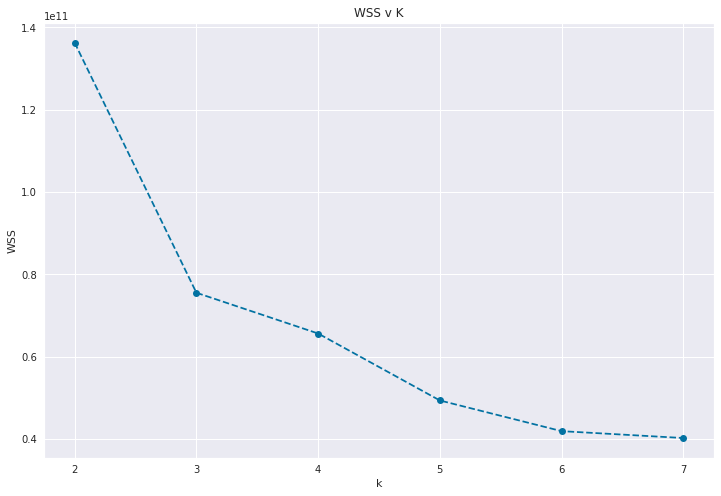

In [91]:
wss = list()
for k in clusters:
    # Model definition
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=7)
    
    # Model training
    kmeans.fit(df7)
    
    # Validation
    wss.append(kmeans.inertia_)

# Ellbow Method
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.title('WSS v K')
plt.xlabel('k')
plt.ylabel('WSS')
plt.show()

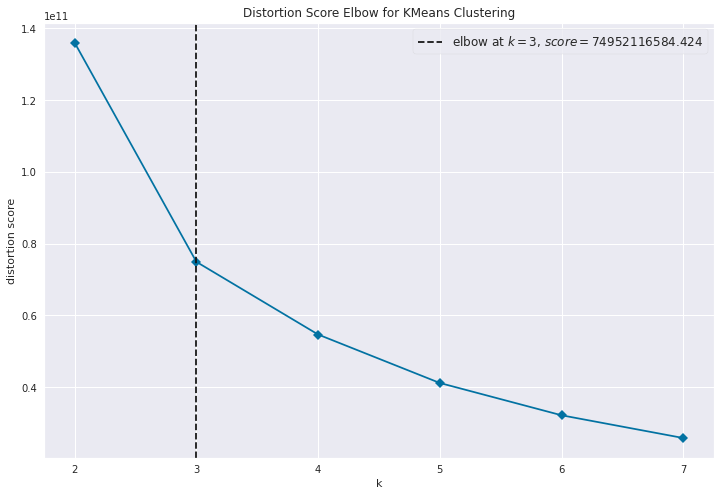

In [92]:
kmeans_viz = KElbowVisualizer(estimator=KMeans(), k=clusters, timings=False)
kmeans_viz.fit(df7)
kmeans_viz.show()
plt.show()

## Silhouette Score

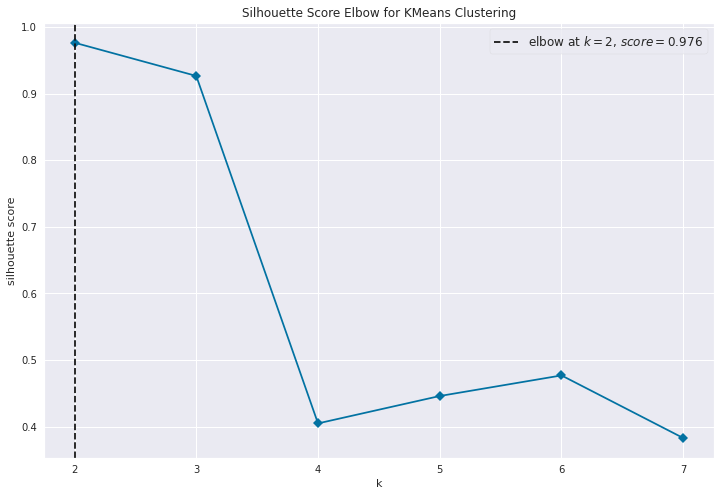

In [93]:
kmeans_viz = KElbowVisualizer(kmeans, k=clusters, metric='silhouette', timings=False)
kmeans_viz.fit(df7)
kmeans_viz.show()
plt.show()

## Silhouette Analysis

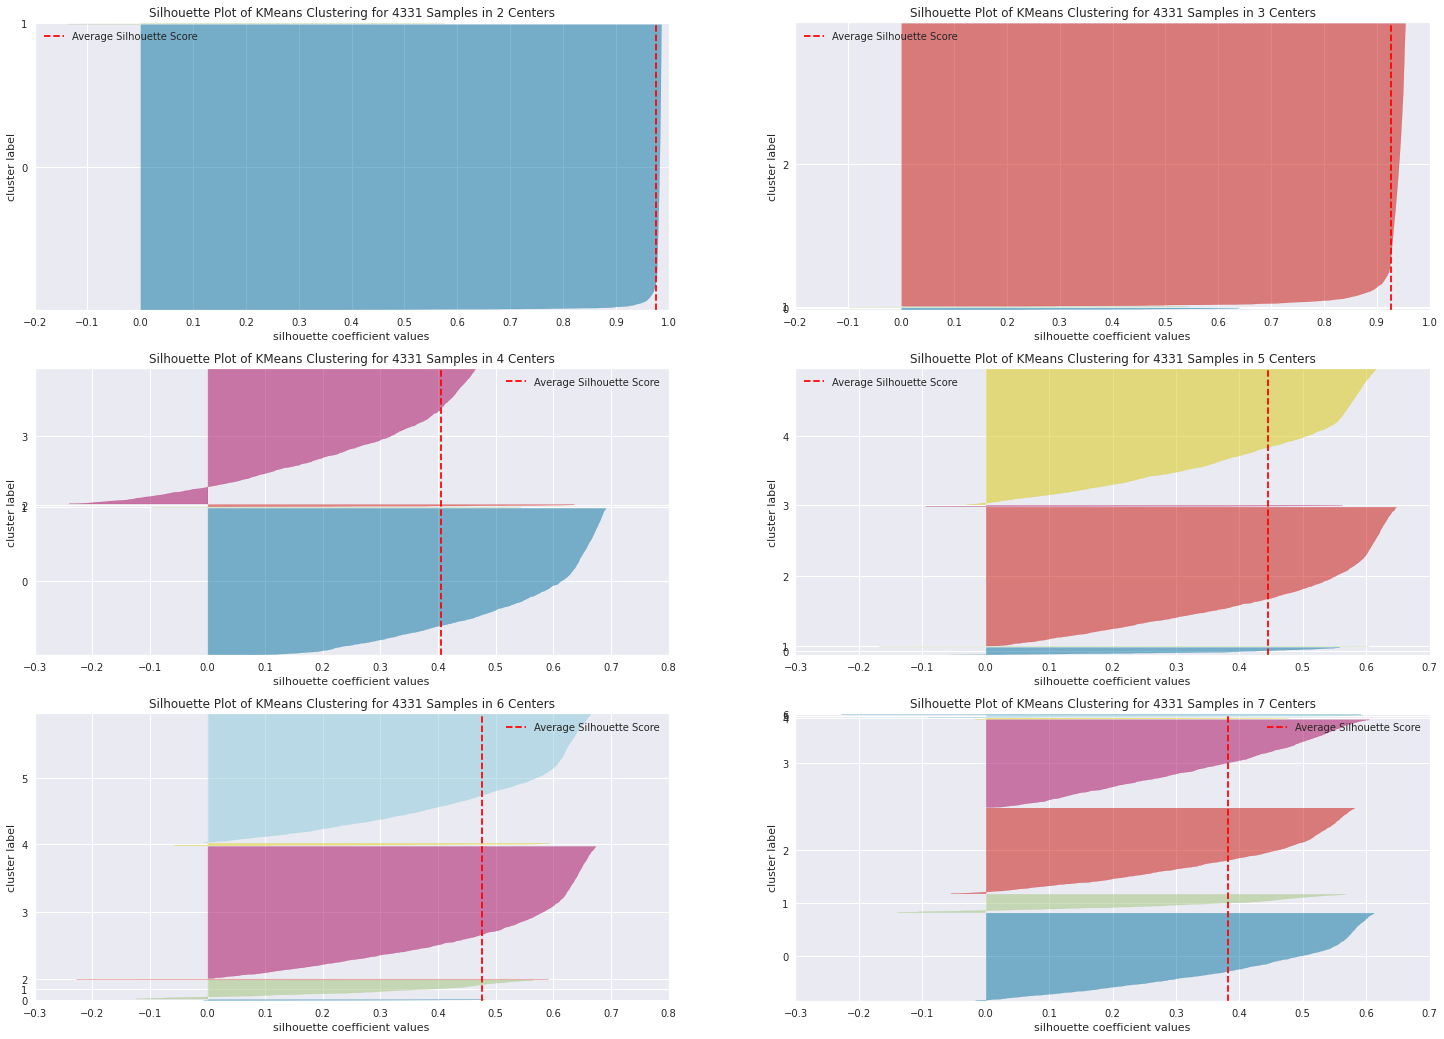

In [99]:
fig, ax = plt.subplots(3, 2, figsize=(25, 18))

clusters = [2, 3, 4, 5, 6, 7]

for k in clusters:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=7)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df7)
    visualizer.finalize()

# Machine Learning

In [11]:
df10 = pd.read_csv('../data/processed/df_ref.csv')

## K-Means

In [12]:
# Model definition
k = 3
kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=7)

# Model training
kmeans.fit(df10)

# Clustering
labels = kmeans.labels_

### Metrics

In [20]:
print(f'WSS: {kmeans.inertia_}')
print(f'SS: {round(silhouette_score(df10, labels, metric="euclidean"), 2)}')

WSS: 65797206714.122086
SS: 0.92


# Cluster Analysis

## Data Input

In [22]:
df11 = pd.read_csv('../data/processed/df_ref.csv')
df11['cluster'] = labels
df11.head()

,customer_id,gross_revenue,recency_days,frequency,cluster
0,17850,5288.63,302,35,2
1,13047,3079.10,31,18,2
2,12583,7187.34,2,18,2
3,13748,948.25,95,5,2
4,15100,635.10,330,6,2


## K-Means

### Visualization Inspection

In [64]:
px.scatter_3d(df11, x='gross_revenue', y='recency_days', z='frequency', color='cluster', title='Clusters Inspection')

### Cluster Profile

In [62]:
# Count
c_profile = df11[['customer_id', 'cluster']].groupby('cluster').count().reset_index().rename(columns={'customer_id': 
                                                                                                      'n_customers'})

# Proportion
per_profile = round(df11[['customer_id', 'cluster']].groupby('cluster').count() / df11['customer_id'].shape * 100, 1)
per_profile.reset_index(inplace=True)
per_profile.rename(columns={'customer_id': '%_customer'}, inplace=True)

# Frequency mean
frec_avg = df11[['cluster', 'frequency']].groupby('cluster').mean().round().reset_index().astype('int64').rename(columns={'frequency': 
                                                                                                                          'avg_frequency'})

# Gross revenue mean
gr_avg = df11[['cluster', 'gross_revenue']].groupby('cluster').mean().round().reset_index().astype('int64').rename(columns={'gross_revenue': 
                                                                                                                              'avg_gross_revenue'})
# Recency days
rd_avg = df11[['cluster', 'recency_days']].groupby('cluster').mean().round().reset_index().astype('int64').rename(columns={'recency_days': 
                                                                                                                           'avg_recency_days'})

In [63]:
profile = pd.merge(c_profile, per_profile, on='cluster', how='left')
profile = pd.merge(profile, frec_avg, on='cluster', how='left')
profile = pd.merge(profile, rd_avg, on='cluster', how='left')
profile = pd.merge(profile, gr_avg, on='cluster', how='left')
profile

,cluster,n_customers,%_customer,avg_frequency,avg_recency_days,avg_gross_revenue
0,0,31,0.7,53,13,40544
1,1,6,0.1,89,7,182182
2,2,4335,99.2,5,92,1373


<font size=4.5>**Cluster 1 (Insiders)**</font>
    
    Number of customers: 6 (0.1% of the customers)
    Mean Frequency: 89 purchases
    Mean Recency: 7 days
    Mean Gross Revenue: $182,182
    
    
<font size=4.5>**Cluster 0**</font>
    
    Number of customers: 31 (0.7% of the customers)
    Mean Frequency: 53 purchases
    Mean Recency: 13 days
    Mean Gross Revenue: $40,544
    
    
<font size=4.5>**Cluster 2**</font>
    
    Number of customers: 4,335 (0.99.2% of the customers)
    Mean Frequency: 5 purchases
    Mean Recency: 92 days
    Mean Gross Revenue: $1,373

# Deploy